# $$Lab\; 2\; for\; MathCalc.\; Numerical\; solution\; methods\; LAES\;$$

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Create Matrix

In [2]:
import HelpFunc as hlp
def isEqualMatrix(A, B, eps = 1e-5):
    return np.sum(A - B > eps) == 0

## System Compatibility

In [3]:
def Sys_Compatibility(A, b):
    NA = np.hstack((A, b)) # NA - New A
    return np.linalg.matrix_rank(NA) == np.linalg.matrix_rank(A)

In [1543]:
N = 5
M = 5
A = hlp.MCR(N, M, 1, 10)
O = hlp.MCO(N)
Z = hlp.MCZ(N, M)


## Def for Condition numvers
>Condition number have 2 level of presicion:
>
>1) When $\delta (A) \approx 0$:
>>
>><font size="5">$cond(A, \delta) = {||A^{-1}||||A||}$</font>
>>
>2) When $\delta (A) \approx 0$:
>>
>><font size="5">$cond(A, \delta) = \frac{||A^{-1}||||A||}{1 - ||A^{-1}\delta||}$</font>
>>

In [1544]:
cond_numb = hlp.cond(A)
cond_numb

34.986702039720846

## Solved LAES by Method Gaussian

## LU decomposition
><font size="5">$A = LU$</font>   <font size ="3">$L = L^{-1}_{1}*...*L^{-1}_{n - 1}$</font>

>$L \;\;\;= \begin{bmatrix} 
1        & 0   & ... & ...        & 0   \\ 
l_{1, 1} & 1   & ... & ...        & 0   \\ 
...      & ... & ... & ...        & ... \\
...      & ... & ... & 1          & 0   \\
l_{n, 1} & ... & ... & l_{n, n-1} & 1   \\
\end{bmatrix}
$

>$L^{-1} = \begin{bmatrix} 
1         & 0   & ... & ...         & 0   \\ 
-l_{1, 1} & 1   & ... & ...         & 0   \\ 
...       & ... & ... & ...         & ... \\
...       & ... & ... & 1           & 0   \\
-l_{n, 1} & ... & ... & -l_{n, n-1} & 1   \\
\end{bmatrix}
$
>
> <font size ="5">$l_{i, j} = \frac{a_{i, j}}{a_{j, j}}$</font>

## LU With chhoose pivot element:

><font size="5">$PA = LU$</font>   <font size ="3">$L = (L^{'}_{1})^{-1}*...*(L^{'}_{n - 1})^{-1}$</font>
> 
>$L^{'}_k = P_{k + 1}*L_{k}*P^{-1}_{k + 1}$
>
> P - it's matrix which swap __rows__ of Matrix (P - like eye matrix with swap rows which need swap in anoter matrix)
>
> $P_{-1}$ - it's matrix which swap __columns__ of Matrix (P - like eye matrix with swap columns which need swap in anoter matrix)




In [1545]:
def LU(A, n, eps = 1e-15):
    L = np.eye(n)
    L = L.astype(float)
    
    U = np.copy(A)
    U = U.astype(float)

    
    for k in range(0, n):
        for j in range(k + 1, n):
            if (U[k, k] < eps):
                raise Exception("Devision on zero")
            L[j, k]   = U[j, k] / U[k, k]
            U[j, k:n] = U[j, k:n] - L[j, k] * U[k, k:n]
    return (U, L)  

def LUP(A, n):
    U = np.copy(A)
    U = U.astype(float)
    
    L = np.eye(n)
    L = L.astype(float)
    
    P = np.eye(n)

    for k in range(0, n):
        i = np.argmax(np.abs(U[k:n, k])) + k
        # if (i != k):
        #     print("swap i = {} and k = {}".format(i, k))
        #     print("this colum U[:, k] = {}".format(U[:, k]))
        swap_var  = np.copy(U[k, k:n])
        U[k, k:n] = U[i, k:n]
        U[i, k:n] = swap_var

        # print("this is L  = \n", L)
        # print("end L\n\n")
    
        swap_var  = np.copy(L[k, 0:k])
        # print("swap_var = ", swap_var)
        L[k, 0:k] = L[i, 0:k]
        L[i, 0:k] = swap_var
        
        # print("this is L  = \n", L)
        # print("end L\n\n")
        
        
        swap_var  = np.copy(P[:, k])
        P[:, k]   = P[:, i]
        P[:, i]   = swap_var
    
        # print(P)
        for j in range(k + 1, n):
            # print(j, k, i)
            L[j, k]  = U[j, k] / U[k, k]
            # print(L[j, k])
            U[j, k:n] = U[j, k:n] - L[j, k] * U[k, k:n]
            # print(U)
        
            
    return (U, L, P)        

In [1546]:
N = 4
A = np.random.randint(1, 10, (N, N))
A = A.astype(float)
(U, L) = LU(A, N)
(U1, L1, P1) = LUP(A, N)

Exception: Devision on zero

In [1547]:
from scipy.linalg import lu
for i in range(1000):
    N = 4
    A = np.random.randint(1, 10, (N, N))
    A = A.astype(float)
    
    (U1, L1, P1) = LUP(A, N)
    (P3, L3, U3) = lu(A)
    try:
        (U, L) = LU(A, N)
    except Exception:
        print("zero devision")
        L = P1@L1
        U = U1
    if(not isEqualMatrix(A, L@U) or not isEqualMatrix(A, P1@L1@U1)):
        print(i)
        print("L =\n{}\nU =\n{}\n\n\n".format(L, U))
        print("P1 =\n{}\nL1 =\n{}\nU1 =\n{}\n\n".format(P1, L1, U1))
        print("P3 =\n{}\nL3 =\n{}\nU3 =\n{}\n\n".format(P3, L3, U3))
        print("A =\n{}\n\n".format(A))
        print("L@U =\n{}\n\n".format(L@U))
        print("P1@L1@U1 =\n{}\n\n".format(P1@L1@U1))
        raise Exception("ERROR")

zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero d

/tmp/ipykernel_8446/1514171325.py:54: RuntimeWarning: invalid value encountered in double_scalars
  L[j, k]  = U[j, k] / U[k, k]


zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero devision
zero d

Unfochantly my LUP don't work i don't know why((( 
UPD: LUP work normaly

### How can we see LU with choose pivot element work great!!! Unlike ordinary LU

## Now solve LAES 

In [1548]:
def Solve_LAES_GAUS(A, n, b):
    U, L = LU(A, n)
    y = np.zeros_like(b)
    x = np.zeros_like(b)
    
    for k in range(0, n):
        y[k] = b[k]
        for i in range(0, k):
            y[k] -= y[i]*L[k, i]
        y[k] = y[k] / L[k, k]
        
    # print(U)    
    for k in range(n - 1, -1, -1):
        x[k] = y[k]
        
        for i in range(n - 1, k, -1):
            # print(k, i)
            # print(U[:, k])
            x[k] -= x[i]*U[k, i]
        x[k] = x[k] / U[k, k]
        # print(x[k], y[k])
    return x  

def Solve_LAES_GAUS_pivot(A, b):
    n = len(A)
    U, L, P = LUP(A, n)
    y = np.zeros_like(b)
    x = np.zeros_like(b)
    L = P@L
    for k in range(0, n):
        y[k] = b[k]
        for i in range(0, k):
            y[k] -= y[i]*L[k, i]
        y[k] = y[k] / L[k, k]
        
    # print(U)    
    for k in range(n - 1, -1, -1):
        x[k] = y[k]
        
        for i in range(n - 1, k, -1):
            # print(k, i)
            # print(U[:, k])
            x[k] -= x[i]*U[k, i]
        x[k] = x[k] / U[k, k]
        # print(x[k], y[k])
        
    return x    

In [1549]:
N = 4
A = np.random.uniform(1, 10, (N, N))
ans = np.random.uniform(1, 19, (N, 1))
b = A @ ans

In [1550]:
My_solve = Solve_LAES_GAUS(A, N, b) 
if (not isEqualMatrix(ans, My_solve)):
    raise Exception("Wrong answer")

In [1551]:
My_pivot_solve = Solve_LAES_GAUS_pivot(A, b)
if(not isEqualMatrix(ans, My_pivot_solve)):
    raise Exception("Wrong answer")

/tmp/ipykernel_8446/4139235373.py:34: RuntimeWarning: divide by zero encountered in true_divide
  y[k] = y[k] / L[k, k]
/tmp/ipykernel_8446/4139235373.py:33: RuntimeWarning: invalid value encountered in multiply
  y[k] -= y[i]*L[k, i]


In [1552]:
Inv_solv = np.linalg.inv(A)@b
if(not isEqualMatrix(ans, Inv_solv)):
    raise Exception("Wrong answer")

How we can see always normal.
P.S. A division by 0 error may occur, but you don't need to look there too much

## Check System compatibility 

In [1553]:
Sys_Compatibility(A, b)

True

let's make 2 dependent columns in matrix A, and check system compatibility again

In [1554]:
A[0] = A[N - 1]
Sys_Compatibility(A, b)

False

And function work noramaly

# Sweep method

<font size="5"> Sweep method - used for solve LAES (SLAE) with matrix which has a tridiagonal form  </font>

<font size="4"> Alghoritm </font>
> <font size="3"> First, we do __first__ iterate over the rows of the matrix and calculate the coefficients:  </font>
>># $y_1 = b_1,\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \alpha_1 = \frac{-c_1}{y_1},\;\;\;\;\; \beta_1 = \frac{d_1}{y_1}$
>>
>># $y_i = b_i + a_i\alpha_{i-1},\;\;\;\;\; \alpha_i = \frac{-c_i}{y_i},\;\;\;\;\; \beta_i = \frac{d_i - a_i\beta_{i-1}}{y_i}$
>
> <font size="3"> Next, we do __second__ iterate (in reverse order) over the rows of the matrix and calculate the answer:  </font>
>># $x_n = \beta_n$
>>
>># $x_i = \alpha_i * x_{i + 1} + \beta_i$

## A sufficient condition for stability:

### $$ |a_i| + |c_i| \leq |b_i|,\;\;\;\;\; |b_i| > |c_i|$$


In [1555]:
def sweep(A, b):
    if(not Sys_Compatibility(A, b)):
        raise Exception("System isn't compatibility")
        
    x     = np.zeros_like(b)
    
    y     = np.zeros_like(b)
    alpha = np.zeros_like(b)
    beta  = np.zeros_like(b)
    
    n  = len(b)
    
    y[0]     = A[0, 0]
    alpha[0] = - A[0, 1] / y[0]
    beta[0]  = b[0] / y[0]
    
    for i in range(1, n - 1):
        
        y[i]     = A[i, i] + A[i, i - 1] * alpha[i - 1]
        alpha[i] = - A[i, i + 1] / y[i]
        beta[i]  = (b[i] - A[i, i - 1]*beta[i - 1]) / y[i]
        
    y[n - 1]     = A[n - 1, n - 1] + A[n - 1, n - 2] * alpha[n - 2]
    beta[n - 1]  = (b[n - 1] - A[n - 1, n - 2]*beta[n - 2]) / y[n - 1]
    
    
    x[n - 1] = beta[n - 1]
    
    for i in range(n - 2, -1, -1):
        x[i] = alpha[i]*x[i + 1] + beta[i]
        
    return x    

In [1556]:
from scipy.sparse import diags

N     = 5
start = 1
end   = 10

A     = np.random.uniform(start, end, (N, N))

zero  = np.diag(A, k = 0)
above = np.diag(A, k = 1)
below = np.diag(A, k = -1)

A   = diags([below, zero, above], [-1, 0, 1]).toarray()
ANS = np.random.uniform(start, end, (N, 1))
b   = A@ANS

In [1557]:
solve = sweep(A, b)
if (not isEqualMatrix(solve, ANS)):
    raise Exception("wrong answer")

## Own vizualizate Error for Iterative method

In [1558]:
def viz_err(err, solve, ans):
    print("it = ", len(err))
    print("||solve - ans|| = {}".format(np.linalg.norm(solve - ans, ord=2)))
    fig, ax = plt.subplots()
    ax.semilogy(err)
    ax.set_ylabel(r'$||x^k - x||$', rotation = 0, labelpad = 50)
    ax.set_xlabel(r'Number iteration $k$')
    ax.grid(True)

<font size="4">The error has a logarithmic dependence on the quantity due to the formulas:</font>
># $x^{k} = Sx^{k - 1} + f$    
># $ \parallel e^{k} \parallel = q^{k} \parallel e^{0} \parallel < \varepsilon$
>>
>># $k >=  \frac{log(\frac{\varepsilon}{ \parallel e^{0} \parallel})}{log(q)}$

# Solved LAES by Jacobi iterative method

## Jacobi formula:
> 
> Let A = L + D + U,
>>
>> L - Strictly lower triangular matrix
>>
>> D - Diagonal matrix
>>
>> U - Strictly upper triangular matrix
>
> $x^{k + 1} = -D^{-1}(L + U)x^{k} + D^{-1}b$
>
>> it's obvious that $det(D) \neq 0 $

## Sufficient condition for convergence:
>In order for the Jacobi method to converge, it is necessary for the matrix A to have a __row diagonal dominance__


In [1559]:

def Solve_LAES_Jacobi(A, b, tol, ans):
    
    if(not Sys_Compatibility(A, b)):
        raise Exception("System isn't compatibility")
    
    if (np.trace(A) < tol * 10**-2):
        print("ERROR")
        return 0
    err    = np.array([])
    x_now  = np.zeros_like(b)
    x_past = np.zeros_like(b)
    
    k = 0
    n = len(A)
    
    while (hlp.second_norm(A @ x_now - b) > tol):
        # print(np.linalg.norm(A @ x_now - b, ord=2))
        k += 1
        x_past = x_now
        for i in range(0, n):
            
            x_now[i] = b[i]
            
            for j in range(0, n):
                if i != j:
                    x_now[i] = x_now[i] - A[i, j]*x_past[j]
                         
            x_now[i] /= A[i, i]        
        err = np.append(err, np.linalg.norm(x_now - ans, ord=2))
        print("iter = {}, err = {}".format(k, err[k - 1]))
    return x_now , err


In [1560]:
N = 100
start = 1
end   = 10 
tol   = 1e-7
A   =  np.random.uniform(start, end, (N, N)) + N * np.eye(N) # eye is used for diagonal dominace 
ANS =  np.random.uniform(start, end, (N, 1))
b = A @ ANS

In [1561]:
solve , err  = Solve_LAES_Jacobi(A, b, tol, ANS)

iter = 1, err = 97.84349228397258
iter = 2, err = 52.819914219792466
iter = 3, err = 34.05365430996251
iter = 4, err = 24.2963253686443
iter = 5, err = 18.860869442576476
iter = 6, err = 13.519199235058219
iter = 7, err = 8.83593703613177
iter = 8, err = 6.363335930897038
iter = 9, err = 5.084809994023181
iter = 10, err = 3.6903025831161878
iter = 11, err = 2.4145700167823803
iter = 12, err = 1.7347862916923271
iter = 13, err = 1.388414565731859
iter = 14, err = 1.0116284989567974
iter = 15, err = 0.662414697344862
iter = 16, err = 0.47349451512297847
iter = 17, err = 0.378899248895728
iter = 18, err = 0.2772145264882597
iter = 19, err = 0.1817006041938508
iter = 20, err = 0.12921278692716193
iter = 21, err = 0.10337779371629964
iter = 22, err = 0.07595213336227827
iter = 23, err = 0.04984263992344546
iter = 24, err = 0.03526503217432497
iter = 25, err = 0.028202651225730034
iter = 26, err = 0.020807172201792824
iter = 27, err = 0.013673478750487014
iter = 28, err = 0.00962595183062791

Make graph error 

it =  80
||solve - ans|| = 4.561286504140795e-10


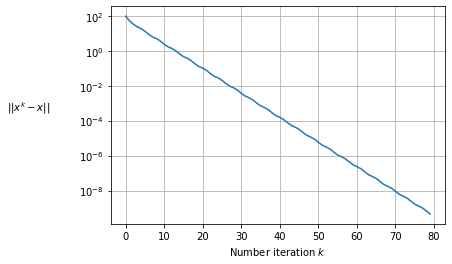

In [1562]:
viz_err(err, solve, ANS)

It's work!!!

# Solved LAES by Seidel iterative method

## Seidel formula

> Let A = L + D + U,
>>
>> L - Strictly lower triangular matrix
>>
>> D - Diagonal matrix
>>
>> U - Strictly upper triangular matrix
>
> $(L + D)x^{k + 1} = -Ux^{k} + b$

## Sufficient condition for convergence:
>In order for the Jacobi method to converge, it is necessary for the matrix A to have a $A = A^{T} > 0$

In [1563]:
def Solve_LAVES_Seidel(A, b, tol, ans):
    
    if(not Sys_Compatibility(A, b)):
        raise Exception("System isn't compatibility")
    
    x_now  = np.zeros_like(b)
    x_past = np.zeros_like(b)
    
    err    = np.array([])
    n = len(b)
    it = 0
    
    while(np.linalg.norm(A@x_now - b, ord=2) > tol):
        it += 1
        x_past = x_now
        
    
        for i in range(n):
            x_now[i] = b[i]
            
            for j in range(0, i):
                x_now[i] = x_now[i] - A[i, j]*x_now[j]
                
            for j in range(i + 1, n):
                x_now[i] = x_now[i] - A[i, j]*x_past[j]
                
            x_now[i] /= A[i, i]     
            
        err = np.append(err, np.linalg.norm(x_now - ans, ord=2))
        print("iter = {}, err = {}".format(it, err[it - 1]))
        
        if (it > 10 and err[0] < err[it - 1]):
            print("err inscrease")
            break 
        if (it > 1000):
            print("too match iterations")
            break
        
    return x_now , err

In [1564]:
from sklearn.datasets import make_spd_matrix
N = 50
start = 1
end   = 10 
tol   = 1e-7
A = make_spd_matrix(N) # create spd matrix
ANS =  np.random.rand(N, 1)
b = A @ ANS

In [1565]:
solve, err = Solve_LAVES_Seidel(A, b, tol, ANS)

iter = 1, err = 2.96644850302486
iter = 2, err = 2.416688143322279
iter = 3, err = 2.1566745195001595
iter = 4, err = 1.9899989406748808
iter = 5, err = 1.8684384062351556
iter = 6, err = 1.7741918117057123
iter = 7, err = 1.697098820814124
iter = 8, err = 1.6315006556977016
iter = 9, err = 1.5746153395157572
iter = 10, err = 1.5251366673581945
iter = 11, err = 1.4823336057568248
iter = 12, err = 1.4456120882693309
iter = 13, err = 1.4143679865413905
iter = 14, err = 1.3879808403461362
iter = 15, err = 1.3658532813989337
iter = 16, err = 1.34744855433022
iter = 17, err = 1.3323096592069965
iter = 18, err = 1.3200601422860216
iter = 19, err = 1.3103928700675247
iter = 20, err = 1.303053684488559
iter = 21, err = 1.2978249908428692
iter = 22, err = 1.2945120578341662
iter = 23, err = 1.2929330062165385
iter = 24, err = 1.2929123502084812
iter = 25, err = 1.2942774334455287
iter = 26, err = 1.2968569699340973
iter = 27, err = 1.3004809764999554
iter = 28, err = 1.3049815374071303
iter = 2

it =  1001
||solve - ans|| = 0.00010483960128491285


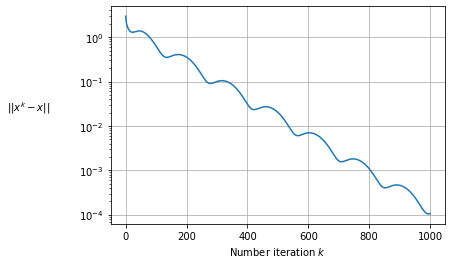

In [1566]:
viz_err(err, solve, ANS)

# Gradient descent method

<font size="5">Error Functionality looks like this: </font>
># $E(x) = \frac{1}{2}<Ax, x> - <b, x>$

<font size="5"> Also, the residual functionality looks like: </font>
># $R(x) = \parallel b - Ax \parallel_{2}$

<font size="5"> Own formul: </font>
># $x^{k + 1} = x^{k} - \tau^{k}(Ax^{k} - b) = x^{k} - \tau^{k}r^{k}$

<font size="5"> if we differentiate the error functionality, then we will find the required $\tau^k$ </font>
># $\tau^{k} = \frac{<r^{k}, r^{k}>}{<Ar^{k}, r^{k}>}$

<font size="5"> $\tau^k$ is updated at every k-step </font>

<font size="6"> $A = A^{T} > 0$ - MUST BE SPD </font>

In [1567]:
def grad_desc(A, b, ans, tol = 1e-7):
    if(not Sys_Compatibility(A, b)):
        raise Exception("System isn't compatibility")
    n      = len(b)
    err    = np.array([])
    x_now  = np.zeros_like(b)
    x_past = np.zeros_like(b)
    r      = b 
    tau    = 0
    k      = 0
    while (np.linalg.norm(r, ord=2) > tol):
        k+=1
        x_past = x_now
        r      = A@x_now - b
        tau    = (r.T @ r) / (r.T @ (A @ r))
        
        x_now  = x_past - tau * r
        
        err = np.append(err, np.linalg.norm(x_now - ans, ord=2))
        print("iter = {}, err = {}".format(k, err[k - 1]))
    return x_now, err
    
    

In [1568]:
from sklearn.datasets import make_spd_matrix
N = 10
start = 1
end   = 10 
tol   = 1e-7
A = make_spd_matrix(N) # create spd matrix
ANS =  np.random.rand(N, 1)
b = A @ ANS

In [1569]:
solve_ans, err = grad_desc(A, b, ANS)

iter = 1, err = 1.7584016373240512
iter = 2, err = 0.8319618177431785
iter = 3, err = 0.7615248288480884
iter = 4, err = 0.43581871007287254
iter = 5, err = 0.4109734290549072
iter = 6, err = 0.27412400955512384
iter = 7, err = 0.26307380032009187
iter = 8, err = 0.18897437243645948
iter = 9, err = 0.18271985862587226
iter = 10, err = 0.13552754308229137
iter = 11, err = 0.1314783498289149
iter = 12, err = 0.09912262975445002
iter = 13, err = 0.09632991736115919
iter = 14, err = 0.07331507933859527
iter = 15, err = 0.07132308793075558
iter = 16, err = 0.054596582960246255
iter = 17, err = 0.053146753192598865
iter = 18, err = 0.04082683811768839
iter = 19, err = 0.039758141419583115
iter = 20, err = 0.030607936971466215
iter = 21, err = 0.029813872884166426
iter = 22, err = 0.022982769930816212
iter = 23, err = 0.022389827498792102
iter = 24, err = 0.017273899935045484
iter = 25, err = 0.016829779233777778
iter = 26, err = 0.012990928599100265
iter = 27, err = 0.012657647747119315
iter

In [1570]:
if (not isEqualMatrix(ANS, solve_ans)):
    raise Exception("Wrong answer")

it =  102
||solve - ans|| = 2.691473330897098e-07


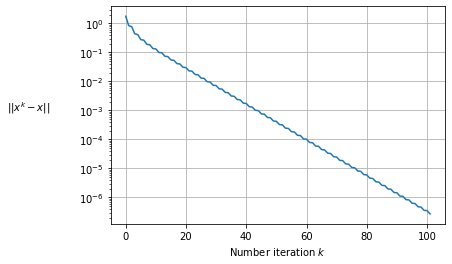

In [1571]:
viz_err(err, solve_ans, ANS)

# Residual method

##  $$\tau^* = \frac{(r^k,Ar^k)}{(Ar^k, Ar^k)}$$

In [1572]:
def resid(A, b, ans, tol = 1e-7):
    if(not Sys_Compatibility(A, b)):
        raise Exception("System isn't compatibility")
        
    n      = len(b)
    err    = np.array([])
    x_now  = np.zeros_like(b)
    x_past = np.zeros_like(b)
    r      = b 
    tau    = 0
    k      = 0
    while (np.linalg.norm(r, ord=2) > tol):
        k+=1
        x_past = x_now
        r      = A@x_now - b
        tau    = (r.T @ (A @ r)) / ((A @ r).T @ (A @ r))
        
        x_now  = x_past - tau * r
        
        err = np.append(err, np.linalg.norm(x_now - ans, ord=2))
        print("iter = {}, err = {}".format(k, err[k - 1]))
    return x_now, err
    
    

In [1573]:
from sklearn.datasets import make_spd_matrix
N = 10
start = 1
end   = 10 
tol   = 1e-7
A = make_spd_matrix(N) # create spd matrix
# A = np.random.uniform(start, end, (N, N))
ANS =  np.random.rand(N, 1)
b = A @ ANS


In [1574]:
solve_ans, err = resid(A, b, ANS)
if (not isEqualMatrix(ANS, solve_ans)):
    raise Exception("Wrong answer")

iter = 1, err = 1.3749100189105115
iter = 2, err = 0.5455954377790544
iter = 3, err = 0.5296982244109439
iter = 4, err = 0.506064480005985
iter = 5, err = 0.49236955092631907
iter = 6, err = 0.47174391526419424
iter = 7, err = 0.45966664239238664
iter = 8, err = 0.4412838680002877
iter = 9, err = 0.4304456009562829
iter = 10, err = 0.41380974505930296
iter = 11, err = 0.4039613645246873
iter = 12, err = 0.3887462247793688
iter = 13, err = 0.37971978089921005
iter = 14, err = 0.3657052394068842
iter = 15, err = 0.35738341864295775
iter = 16, err = 0.34441472454231925
iter = 17, err = 0.336711730004677
iter = 18, err = 0.32467399063802294
iter = 19, err = 0.31752382439023086
iter = 20, err = 0.30632667182640677
iter = 21, err = 0.29967613946060095
iter = 22, err = 0.28924490180393236
iter = 23, err = 0.28304949647006633
iter = 24, err = 0.27332022624111085
iter = 25, err = 0.2675416828642162
iter = 26, err = 0.2584583160894419
iter = 27, err = 0.25306310347109845
iter = 28, err = 0.24457

it =  809
||solve - ans|| = 1.3323853931024245e-06


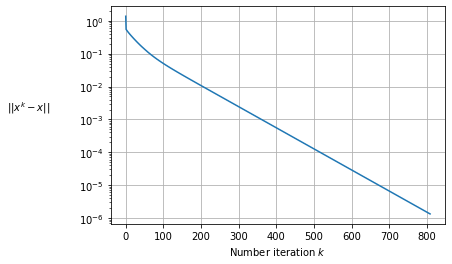

In [1575]:
viz_err(err, solve_ans, ANS)